In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1 align="center"><b><u>Lecture 3 - Lebesgue Integral and Measure </u></b></h1>

The example of pointwise convergence not preserving continuity is shown below.  The sequence of functions are defined by the integer $n$ as:

$$
f_n(x) = x^n
$$

which converges to 

$$
f(x) = 
\lim_{n\rightarrow\infty} f_n(x) = 
\begin{cases}
0 \text{    for } 0 \leq x < 1\\
1 \text{    at } x=1
\end{cases}
$$

This is not a continuous function, and this is displayed below.

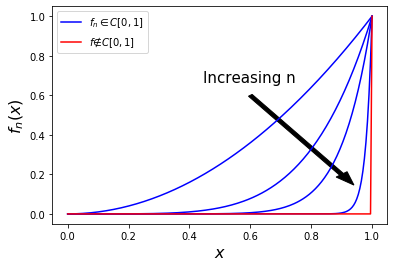

In [2]:
## Plotting
def fn(x,n): return pow(x,n)
x = np.linspace(0,1,200)

plt.plot(x,fn(x,2),color='b')
plt.plot(x,fn(x,5),color='b')
plt.plot(x,fn(x,10),color='b')
plt.plot(x,fn(x,50),color='b',label=r"$f_n \in C[0,1]$")
y = np.zeros(200)
y[-1] = 1
plt.plot(x,y,color='r',label=r"$f \notin C[0,1]$")
plt.arrow(0.6,0.6,0.3,-0.4,color='k',width=0.015)
plt.annotate("Increasing n",xy=(0.45,0.65),xycoords="axes fraction",fontsize=15)
plt.xlabel(r"$x$",fontsize=16)
plt.ylabel(r"$f_n(x)$",fontsize=16)
plt.legend()
plt.show()

Now to demonstrate the problem seen in the lectures.  The function series $f_n$ is given by:

$$
f_n(x) = 2n^2x\exp(-n^2x^2)
$$
on $[0,1], \forall n$.  Now considering taking the limit after the integral, we must find:

$$
\lim_{n\rightarrow \infty} \int_0^1 f_n(x)dx = \lim_{n\rightarrow \infty} \int_0^1 2n^2x\exp(-n^2x^2) dx = \lim_{n\rightarrow \infty} \left[ -\exp(-n^2x^2) \right]_{0}
^{1} = \lim_{n\rightarrow \infty} (1-\exp(-n^2)) = 1
$$

The value of the integral tending to 1 is shown in the graph below.

In [3]:
func = lambda n: 1-np.exp(-pow(n,2)) 

In [4]:
x = np.arange(1,6)
y = func(x)

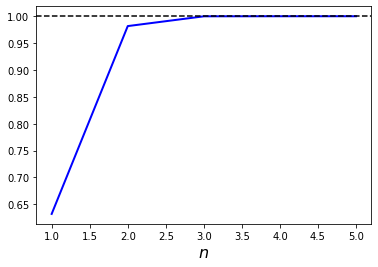

In [5]:
plt.plot(x,y,color='b',linewidth=2)
plt.axhline(1,color='k',linestyle='--')
plt.xlabel(r"$n$",fontsize=16)
plt.show()

If the limit is taken before the integral the value is zero.  A subset of integrands with different $n$ are shown below.  The resulting integral for the limit $n\rightarrow\infty$ is zero. 

$$\int_{0}^{1}\lim_{n\rightarrow \infty}f_{n}(x)dx = \int_{0}^{1} 0 dx = 0 $$

In [6]:
def fn(x,n): return 2*pow(n,2)*x*np.exp(-pow(n*x,2))

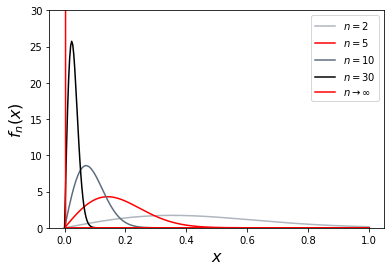

In [20]:
x = np.linspace(0,1,300)
plt.plot(x,fn(x,2),color='#AEB6BF',label=r"$n=2$")
plt.plot(x,fn(x,5),color='r',label=r"$n=5$")
plt.plot(x,fn(x,10),color='#5D6D7E',label=r"$n=10$")
plt.plot(x,fn(x,30),color='k',label=r"$n=30$")
fi = np.zeros(300)
fi[0] = 1000 # i.e. very large compared to current limits
plt.plot(x,fi,color='r',label=r"$n\rightarrow \infty$")
plt.xlabel(r"$x$",fontsize=16)
plt.ylabel(r"$f_n(x)$",fontsize=16)
plt.ylim([0,30])
plt.legend()
plt.show()